----

## __Cosine Similarity__

Cosine similarity is a metric used to measure the similarity of two vectors. Specifically, 

- It measures the similarity in the direction or orientation of the vectors ignoring differences in their magnitude or scale.
- Both vectors need to be part of the same inner product space, meaning they must produce a scalar through inner product multiplication.
- The similarity of two vectors is measured by the cosine of the angle between them.

Cosine similarity is a way to measure how similar two vectors are—not by their size, but by the direction they point in.
Think of each vector as an arrow. Even if one arrow is much longer than the other, cosine similarity only looks at how much they point the same way, not how long they are.

1. __It measures the similarity in the direction or orientation… ignoring magnitude.__

* Two vectors can be very different in length but cosine similarity doesn’t care about that.
* It cares only about the angle between them:
    - Angle 0° → pointing in exactly the same direction → similarity = 1
    - Angle 90° → completely unrelated → similarity = 0
    - Angle 180° → pointing opposite directions → similarity = –1
      
So the result is a number from –1 to 1.


2. __Both vectors need to be part of the same inner product space.__

This is a math way of saying:
* Both vectors must be compatible with each other.
* You must be able to take their dot product (a type of multiplication that gives a single number).
  
In practice, this just means:

* They must have the same number of dimensions.
* They must live in the same “kind” of space (e.g., both are 3-D vectors, or both are 300-D word embeddings, etc.).

3. __The similarity is measured by the cosine of the angle between them.__

The formula for cosine similarity is: 
                
                cosine similarity = dot product of the vectors/product of their lengths

This computes the cosine of the angle θ between the two vectors.

__It's commonly used in:__

* NLP word embeddings (how similar two words are)
* Recommendation systems (how related two user preference vectors are)
* Document similarity

__Calculating Cosine Similarity__

Cosine Similarity is calculated as dot prodcut of the vector divided by their magnitude, 


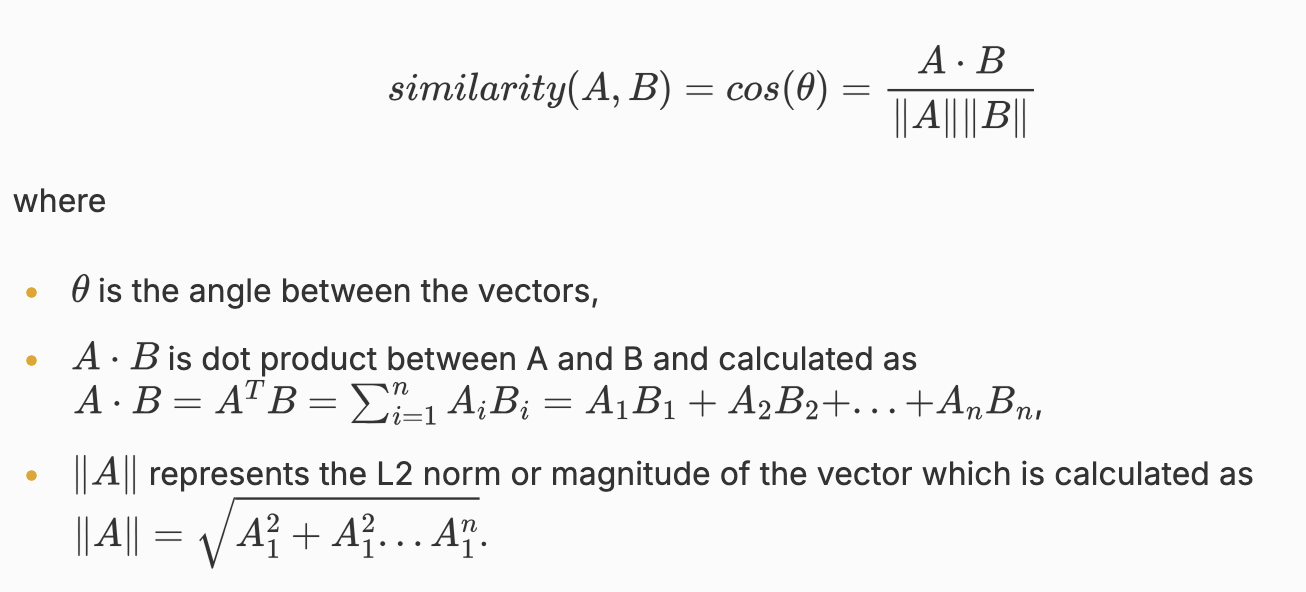                         

The similarity can take values between -1 and +1. Smaller angles between vectors produce larger cosine values, indicating greater cosine similarity. For example:

- When two vectors have the same orientation, the angle between them is 0, and the cosine similarity is 1.
- Perpendicular vectors have a 90-degree angle between them and a cosine similarity of 0.
- Opposite vectors have an angle of 180 degrees between them and a cosine similarity of -1.

In [42]:
import numpy as np

def cosine_similarity(x, y):

    # Ensure length of X and y are same

    if len(x) != len(y):
        return None

    # compute dot product of x and y
    dot_product = np.dot(x,y)

    # compute L2 norm(magnitude) of X and y
    magnitude_x = np.sqrt(np.sum(x**2))
    magnitude_y = np.sqrt(np.sum(y**2))

    # compute cosine similarity between x and y 
    cosine_similarity = dot_product / (magnitude_x * magnitude_y)

    return cosine_similarity

In [46]:
corpus = ['My name is Pawan',
          'What is my Name',
          'Pawan is enginner',
          'SRM is a engineering college',
         'My name is Pawa']

corpus

['My name is Pawan',
 'What is my Name',
 'Pawan is enginner',
 'SRM is a engineering college',
 'My name is Pawa']

In [62]:
# using scikit-learn for vectorizing the text

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X = CountVectorizer().fit_transform(corpus).toarray()
X

array([[0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]])

In [60]:
print(cosine_similarity(X[0], X[1]))
print(cosine_similarity(X[0], X[2]))
print(cosine_similarity(X[0], X[3]))
print(cosine_similarity(X[2], X[3]))
print(cosine_similarity(X[3], X[4]))
print(cosine_similarity(X[0], X[4]))

0.75
0.5773502691896258
0.25
0.2886751345948129
0.25
0.75


In [74]:
Y = TfidfVectorizer().fit_transform(corpus).toarray()
Y

array([[0.        , 0.        , 0.        , 0.35765846, 0.50267649,
        0.50267649, 0.        , 0.60556842, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.3269504 , 0.45951737,
        0.45951737, 0.        , 0.        , 0.        , 0.68614212],
       [0.        , 0.        , 0.72971837, 0.34771471, 0.        ,
        0.        , 0.        , 0.58873218, 0.        , 0.        ],
       [0.55666851, 0.55666851, 0.        , 0.26525553, 0.        ,
        0.        , 0.        , 0.        , 0.55666851, 0.        ],
       [0.        , 0.        , 0.        , 0.3269504 , 0.45951737,
        0.45951737, 0.68614212, 0.        , 0.        , 0.        ]])

In [76]:
print(cosine_similarity(Y[0], Y[1]))
print(cosine_similarity(Y[0], Y[2]))
print(cosine_similarity(Y[0], Y[3]))
print(cosine_similarity(Y[2], Y[3]))
print(cosine_similarity(Y[3], Y[4]))
print(cosine_similarity(Y[0], Y[4]))

0.5789137387733785
0.48088072826319567
0.09487088535789841
0.09223325002228397
0.0867254003712676
0.5789137387733785


----